# CS 5483: Project 4

#### Question 1: Module 7 -- Real world networks and features

1.a) Read the graph from https://networkrepository.com/power-US-Grid.php

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import gzip
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats

In [7]:
re = open ("power-US-Grid.mtx", 'rb')

G = sio.mmread(re)
#G = nx.read_edgelist(re, nodetype=int)  
re.close()

In [28]:
G_adj = G.todense() #Make an adjancent matrix for the edgelist

1.b) For the given graph compute the degree distribution. (Do not use networkx library to compute the distribution)

In [29]:
n = len(G_adj)
Unit = np.ones((n, 1)) # Make a matrix with one column with 1s
Distr = G_adj*Unit # Multiple these matrix
print(Distr) # Degree distribution for each nodes

[[4.]
 [1.]
 [1.]
 ...
 [2.]
 [2.]
 [3.]]


1.c) Plot a log-log graph of the distribution where x-axis represents log of degrees, and the y-axis represents log of frequency of the degrees. Does the plot show a linear decay?

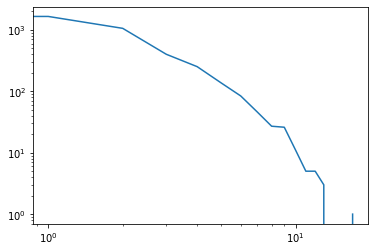

In [53]:
counter = np.zeros(n)
for element in Distr:
  counter[int(element)-1] += 1
# Next part is to find out what the range of the graph should go.
length_x = 0
for i in range(0, n):
  if counter[i] != 0:
    length_x = i   
# The value length_x means there is no nodes have more than length_x+1 degrees.
plt.loglog(counter[0:length_x])
plt.show()
# The highest degree is not that large so the graph is not too staight like a linear.

1.d) Determine alpha in the power law distribution using the equation

 alpha = 1 + n/(summation ln 𝑥_𝑖/(𝑥_min−1/2))
 - i ranges from 0 to number of degrees
 - where n in number of degrees
 - x_i is each degree in the degree array
 - x_min is the minimum degree

In [65]:
alpha = 0
minK = int(min(Distr))
for i in range(0, n):
  alpha = alpha + np.log(int(Distr[i])/(minK-0.5))
alpha = 1 + n/(alpha)
print(alpha)

1.6688002974080596


#### Question 2: Module 8 -- Random graphs
*You may use networkx library*

2.a) Construct 5 random undirected graph with n = 1000, and probability 0.01, 0.1, 0.2, 0.3, 0.5 as G1, G2, G3, G4, and G5. Then find the size of the largest connected component. 

**Note : Use different seed value for each graph.**

In [107]:
G1 = nx.erdos_renyi_graph(1000,0.01)
G2 = nx.erdos_renyi_graph(1000,0.1)
G3 = nx.erdos_renyi_graph(1000,0.2)
G4 = nx.erdos_renyi_graph(1000,0.3)
G5 = nx.erdos_renyi_graph(1000,0.5)

In [108]:
components1 = nx.connected_components(G1)
components2 = nx.connected_components(G2)
components3 = nx.connected_components(G3)
components4 = nx.connected_components(G4)
components5 = nx.connected_components(G5)

In [109]:
size1 = []
for component in components1:
    size1.append(f'{len(component)}')
for component in components2:
    size1.append(f'{len(component)}')
for component in components3:
    size1.append(f'{len(component)}')
for component in components4:
    size1.append(f'{len(component)}')
for component in components5:
    size1.append(f'{len(component)}')
print(size1)

['1000', '1000', '1000', '1000', '1000']


So the largest size of all of them is 1000 which means they only have one component.

2.b) Plot the following

- x-axis probablity
- y-axis largest connected component

and infer what does increase in probablity mean with respect to the largest connected component


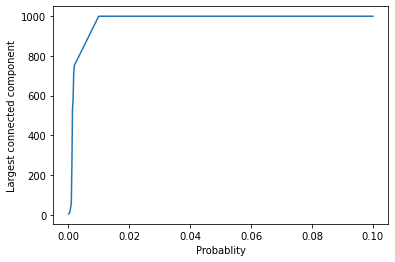

In [127]:
#To plot the probablity graph, the previous graphes doesn't have enought factors
x = [0.0001, 0.0005, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002, 0.01, 0.02, 0.05, 0.1]
y = []      # largest connected component
ad = []      # average degree
avSmall = []    # average size of small components
for i in range(0, 12):
  n = -1
  G = nx.erdos_renyi_graph(1000,x[i])
  componentsN = nx.connected_components(G)
  maxComponent = 0
  for component in componentsN:
    n += 1
    if len(component) > maxComponent:
      maxComponent = len(component)
  y.append(maxComponent)  
  if n == 0:
    avSmall.append(0)
  else:
    avSmall.append((1000 - maxComponent)/n) # calculate the average size
  degree_sequence = [d for n, d in G.degree()]
  ave = sum(degree_sequence)/1000
  ad.append(ave)
plt.plot(x, y)
plt.xlabel('Probablity')
plt.ylabel('Largest connected component')
plt.show()

2.c) For the same set of graphs, compute the average degree and plot probablity on the x-axis, and average degree on the y-axis


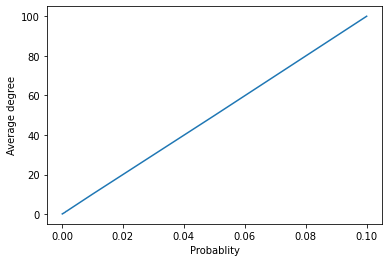

In [128]:
plt.plot(x, ad)
plt.xlabel('Probablity')
plt.ylabel('Average degree')
plt.show()

2.d) Finally, compute the average size of the small component for each graph G1, ..., G5

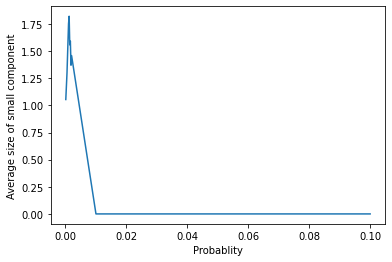

In [131]:
# Since there is NO small compoent for each G1 to G5, x will be use instead
plt.plot(x, avSmall)
plt.xlabel('Probablity')
plt.ylabel('Average size of small component')
plt.show()

@inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {Proceedings of the Twenty-Ninth AAAI Conference on Artificial Intelligence},
      url={http://networkrepository.com},
      year={2015}
  }